# K-means Clustering

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


In [3]:
X= df.iloc[:, [1,2]].values

Text(0, 0.5, 'Spending Score (1-100)')

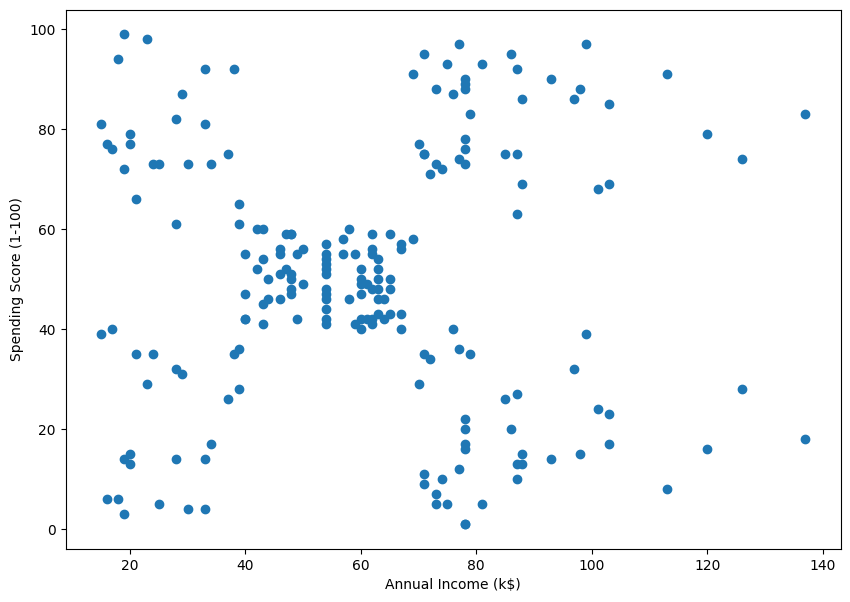

In [4]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [5]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [6]:
np.random.seed(10)

In [7]:
def initial_centroids(X,number_cluster):
    centroid_indexes=np.random.choice(range(len(X)),number_cluster,replace=False)
    centroids=X[centroid_indexes]
    return np.array(centroids)

In [8]:
centroids=initial_centroids(X,number_cluster=5)
centroids

array([[ 46,  46],
       [ 17,  76],
       [ 24,  35],
       [137,  18],
       [ 43,  54]], dtype=int64)

In [9]:
def assign_clusters(X,centroids):
    clusters = []
    for i in range(len(X)):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid,X[i,:]))
        cluster = distances.index(min(distances))
        clusters.append(cluster)
    return np.array(clusters)

In [10]:
clusters=assign_clusters(X,centroids)
clusters

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 4,
       2, 4, 4, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 0, 4,
       0, 0, 4, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

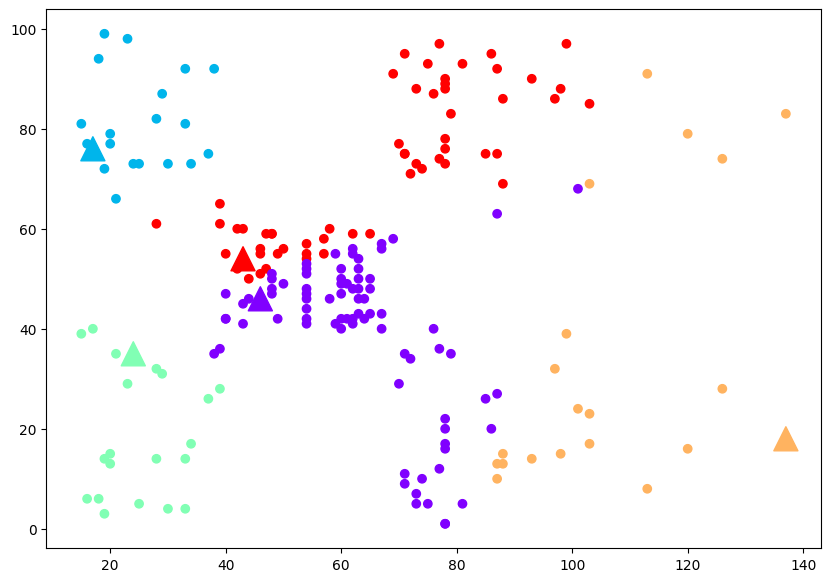

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(clusters), cmap='rainbow',s=300,marker="^")
plt.show()

In [12]:
X[clusters==2].mean(axis=0)

array([25.14285714, 19.52380952])

In [13]:
set(clusters)

{0, 1, 2, 3, 4}

In [14]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(X,clusters):
    new_centroids = []
    for c in set(clusters):
        current_cluster = X[clusters==c]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return np.array(new_centroids)

In [15]:
centroids=calc_centroids(X,clusters)
centroids

array([[ 63.08641975,  39.20987654],
       [ 24.95      ,  81.        ],
       [ 25.14285714,  19.52380952],
       [106.95      ,  34.05      ],
       [ 66.13793103,  71.60344828]])

In [16]:
np.unique(clusters)

array([0, 1, 2, 3, 4])

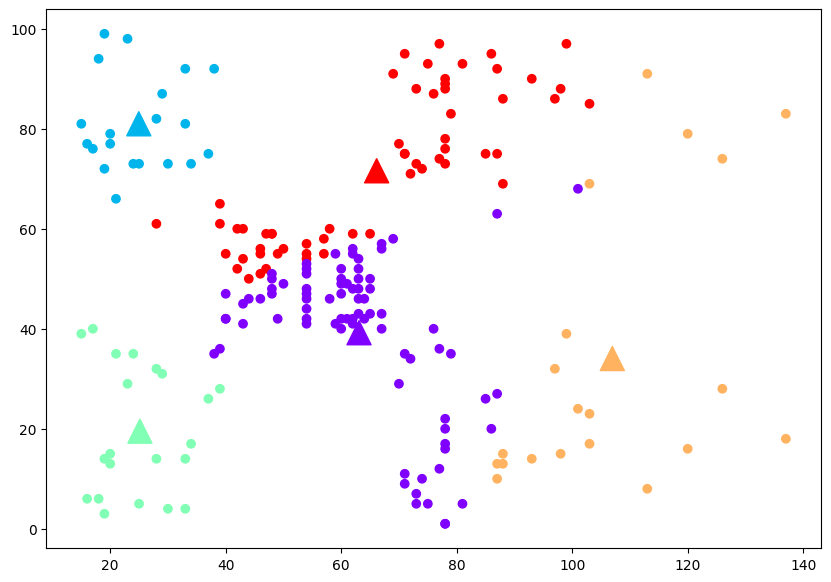

In [17]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(clusters), cmap='rainbow',s=300,marker="^")
plt.show()

In [18]:
clusters=assign_clusters(X,centroids)
clusters

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3])

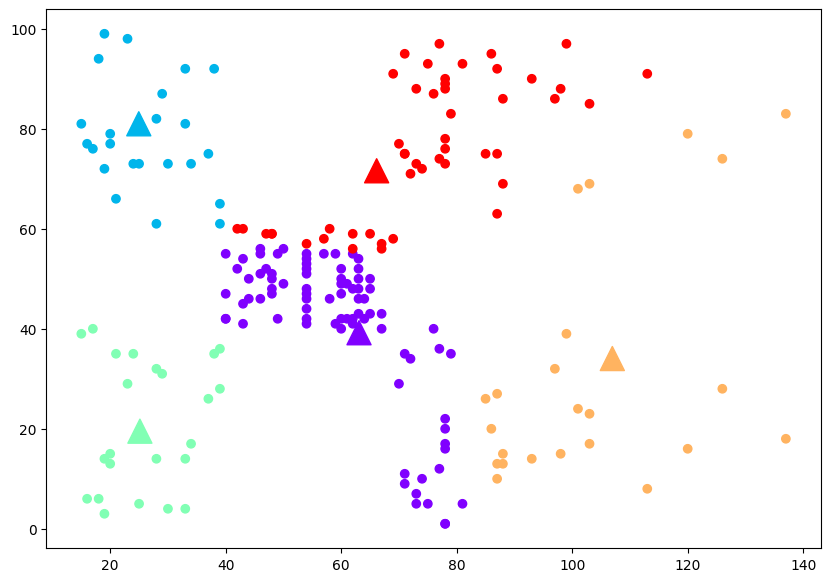

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(clusters), cmap='rainbow',s=300,marker="^")
plt.show()

In [20]:
centroids=calc_centroids(X,clusters)
centroids

array([[ 59.51807229,  40.65060241],
       [ 26.30434783,  78.56521739],
       [ 26.30434783,  20.91304348],
       [103.69565217,  31.7826087 ],
       [ 74.52083333,  75.97916667]])

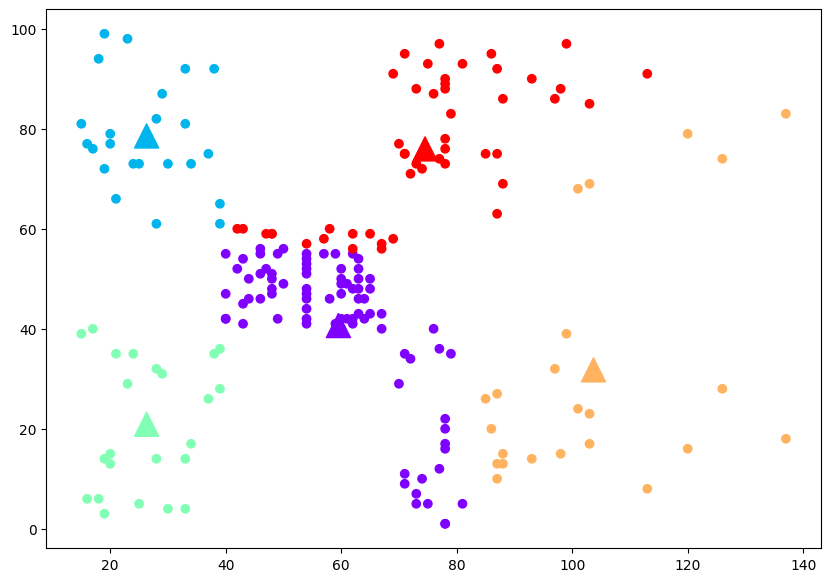

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(clusters), cmap='rainbow',s=300,marker="^")
plt.show()

In [22]:
# Calculate total variance
def calc_total_variance(X,clusters,centroids):
    Wks=[]
    for c in set(clusters):
        current_cluster = X[clusters==c]
        Wk=0
        for i in range(len(current_cluster)):
            Wk=Wk+sum((current_cluster[i,:]-centroids[c,:])**2)
        Wks.append(Wk)
    return np.sum(Wks)

In [23]:
calc_total_variance(X,clusters,centroids)

78258.54869477912

In [24]:
def k_means_clustering(X,number_cluster):
    np.random.seed(42)
    best_variance=float('inf')
    #Repeat the k-means clustering 10 times from random starts
    for i in range(10):
        difference=1000
        centroids=initial_centroids(X,number_cluster)
        clusters=assign_clusters(X,centroids)
        variance=calc_total_variance(X,clusters,centroids)
        while difference>0.01:
            centroids=calc_centroids(X,clusters)
            clusters=assign_clusters(X,centroids)
            newvariance=calc_total_variance(X,clusters,centroids)
            difference=np.abs(variance-newvariance)
            variance=newvariance
        if variance<=best_variance:
            best_cluster=clusters
            best_centroid=centroids
            best_variance=variance
    return best_variance,best_cluster,best_centroid

In [25]:
variance,clusters,centroids=k_means_clustering(X,number_cluster=5)

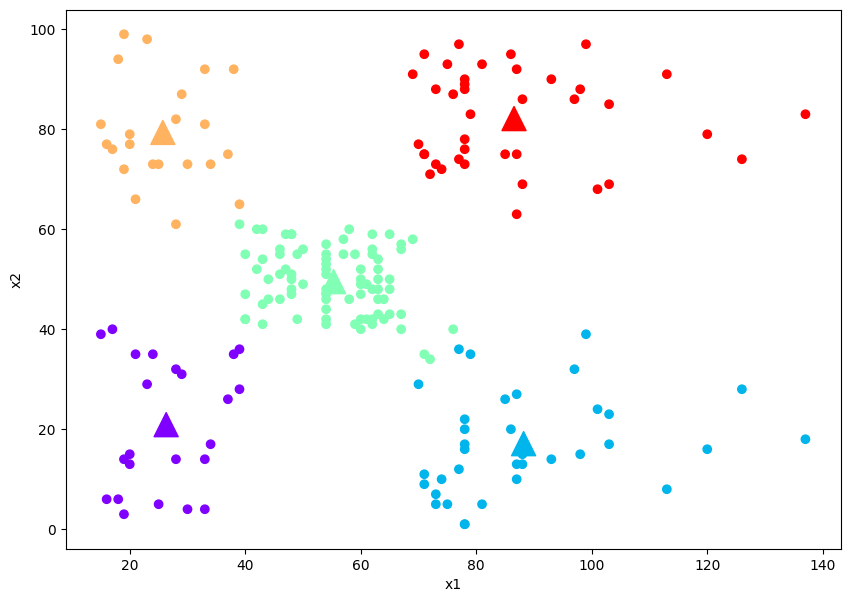

In [26]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(clusters), cmap='rainbow',s=300,marker="^")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

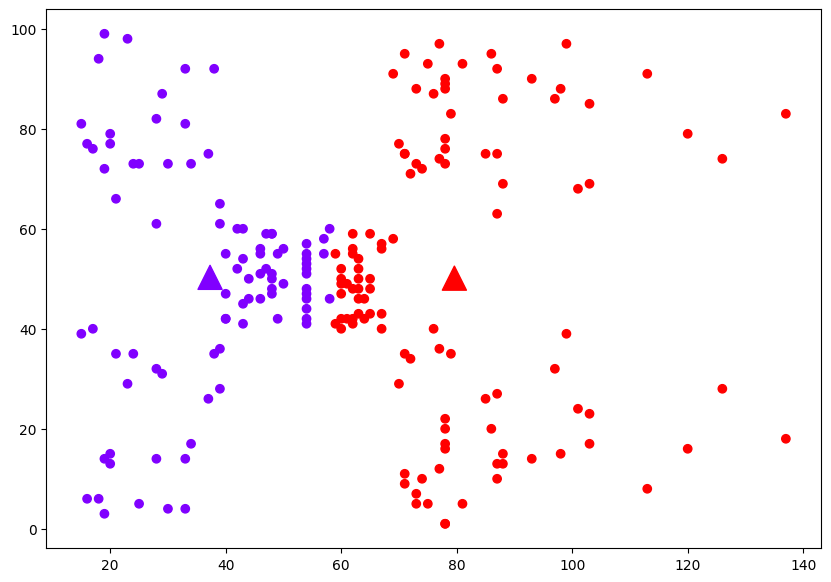

In [27]:
variance,clusters,centroids=k_means_clustering(X,number_cluster=2)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(clusters), cmap='rainbow',s=300,marker="^")
plt.show()

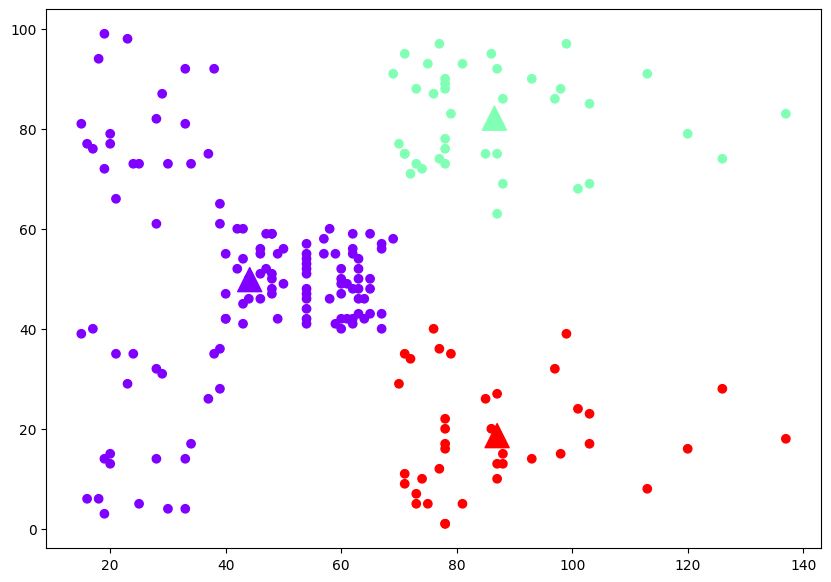

In [28]:
variance,clusters,centroids=k_means_clustering(X,number_cluster=3)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(clusters), cmap='rainbow',s=300,marker="^")
plt.show()

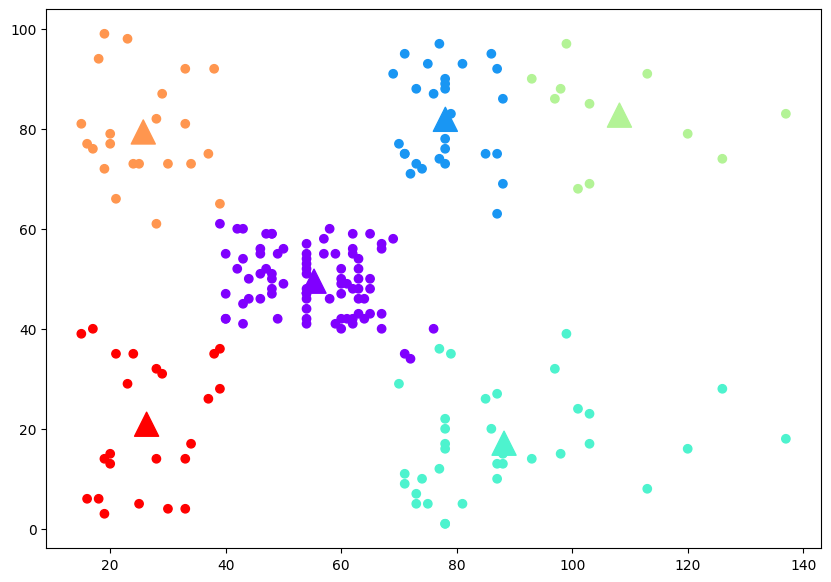

In [29]:
variance,clusters,centroids=k_means_clustering(X,number_cluster=6)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.unique(clusters), cmap='rainbow',s=300,marker="^")
plt.show()

As you increase the number of clusters the variance will always decrease
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. 
The method consists of plotting the explained variation as a function of the number of clusters, 
and picking the elbow of the curve as the number of clusters to use.

In [30]:
variances=[]
for k in range(2,11):
    variance,clusters,centroids=k_means_clustering(X,number_cluster=k)
    variances.append(variance)

Text(0.5, 0, 'k')

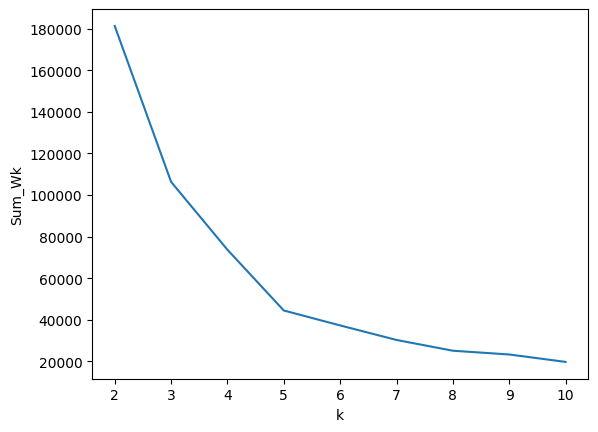

In [31]:
plt.plot(range(2,11),variances)
plt.ylabel('Sum_Wk')
plt.xlabel('k')